In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("Dataset/Train.csv")
test = pd.read_csv("Dataset/Test.csv")

In [3]:
print("Size of Train Data: ", len(train))
print("Size of Test Data: ", len(test))

Size of Train Data:  7000
Size of Test Data:  3000


In [4]:
print("List of Columns:", end = '\t')
print(list(train.columns))
print()
print("How many colums: ", len(list(train.columns)))

List of Columns:	['Employee_ID', 'Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate']

How many colums:  24


In [5]:
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [6]:
test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


### Pre-processing Steps
* check for Nan Value and replace

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
Employee_ID                  7000 non-null object
Gender                       7000 non-null object
Age                          6588 non-null float64
Education_Level              7000 non-null int64
Relationship_Status          7000 non-null object
Hometown                     7000 non-null object
Unit                         7000 non-null object
Decision_skill_possess       7000 non-null object
Time_of_service              6856 non-null float64
Time_since_promotion         7000 non-null int64
growth_rate                  7000 non-null int64
Travel_Rate                  7000 non-null int64
Post_Level                   7000 non-null int64
Pay_Scale                    6991 non-null float64
Compensation_and_Benefits    7000 non-null object
Work_Life_balance            6989 non-null float64
VAR1                         7000 non-null int64
VAR2                         6423 non-null fl

In [8]:
train.isna().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [9]:
train = train.drop('VAR2',axis=1)
test = test.drop('VAR2',axis=1)
train = train.drop('VAR4', axis=1)
test = test.drop('VAR4', axis=1)

### We have missing values in Age, Time_of_service and Work_Life_balance and all are of type float64

In [10]:
import math
work_life_fill = float(math.floor(train['Work_Life_balance'].mean()))
age_fill = float(math.ceil(train['Age'].mean()))
service_fill = float(math.floor(train['Time_of_service'].mean()))

In [11]:
print(work_life_fill,age_fill,service_fill)

2.0 40.0 13.0


In [12]:
train['Work_Life_balance'] = train['Work_Life_balance'].fillna(work_life_fill)
train['Age'] = train['Age'].fillna(age_fill)
train['Time_of_service'] = train['Time_of_service'].fillna(service_fill)

In [13]:
train.isna().sum() == 0

Employee_ID                   True
Gender                        True
Age                           True
Education_Level               True
Relationship_Status           True
Hometown                      True
Unit                          True
Decision_skill_possess        True
Time_of_service               True
Time_since_promotion          True
growth_rate                   True
Travel_Rate                   True
Post_Level                    True
Pay_Scale                    False
Compensation_and_Benefits     True
Work_Life_balance             True
VAR1                          True
VAR3                          True
VAR5                          True
VAR6                          True
VAR7                          True
Attrition_rate                True
dtype: bool

In [14]:
test['Work_Life_balance'] = test['Work_Life_balance'].fillna(work_life_fill)
test['Age'] = test['Age'].fillna(age_fill)
test['Time_of_service'] = test['Time_of_service'].fillna(service_fill)

In [15]:
test.isna().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    3
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR3                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

In [16]:
pay_fill = float(math.floor(train['Pay_Scale'].mean()))
test['Pay_Scale'] = test['Pay_Scale'].fillna(pay_fill)
train['Pay_Scale'] = train['Pay_Scale'].fillna(pay_fill)

In [17]:
train_ID = train['Employee_ID']
train = train.drop('Employee_ID',axis=1)
test_ID = test['Employee_ID']
test = test.drop('Employee_ID',axis=1)

#### Now there are no missing values, Next step is to deal with categorical data

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
Gender                       7000 non-null object
Age                          7000 non-null float64
Education_Level              7000 non-null int64
Relationship_Status          7000 non-null object
Hometown                     7000 non-null object
Unit                         7000 non-null object
Decision_skill_possess       7000 non-null object
Time_of_service              7000 non-null float64
Time_since_promotion         7000 non-null int64
growth_rate                  7000 non-null int64
Travel_Rate                  7000 non-null int64
Post_Level                   7000 non-null int64
Pay_Scale                    7000 non-null float64
Compensation_and_Benefits    7000 non-null object
Work_Life_balance            7000 non-null float64
VAR1                         7000 non-null int64
VAR3                         7000 non-null float64
VAR5                         7000 non-null i

#### Categorical object with object type are : Gender, Relationship_Status, Hometown, Unit, Decision_skill_possess, Compensation_and_Benefits.

In [19]:
train['Gender'].value_counts()

F    4114
M    2886
Name: Gender, dtype: int64

In [20]:
train['Gender'] = train['Gender'].map({'M':-1, 'F': 1})
test['Gender'] = test['Gender'].map({'M':-1, 'F': 1})

In [21]:
train['Relationship_Status'].value_counts()

Married    4520
Single     2480
Name: Relationship_Status, dtype: int64

In [22]:
train['Relationship_Status'] = train['Relationship_Status'].map({'Married':1, 'Single': -1})
test['Relationship_Status'] = test['Relationship_Status'].map({'Married':-1, 'Single': 1})

In [23]:
train['Hometown'].value_counts()

Lebanon        2070
Springfield    1736
Franklin       1523
Washington     1106
Clinton         565
Name: Hometown, dtype: int64

In [24]:
train['Hometown'] = train['Hometown'].map({'Lebanon':4, 'Springfield': 3, 'Franklin': 2, 'Washington': 1, 'Clinton': 0})
test['Hometown'] = test['Hometown'].map({'Lebanon':4, 'Springfield': 3, 'Franklin': 2, 'Washington': 1, 'Clinton': 0})

In [25]:
train['Unit'].value_counts()

IT                           1394
Logistics                    1173
Sales                         943
Operarions                    706
R&D                           680
Purchasing                    504
Accounting and Finance        496
Human Resource Management     344
Marketing                     212
Production                    211
Quality                       193
Security                      144
Name: Unit, dtype: int64

In [26]:
train['Unit'] = train['Unit'].map({'IT':11,'Logistics':10,'Sales':9,'Operarions':8,'R&D':7,'Purchasing':6,'Accounting and Finance':5,'Human Resource Management':4,'Marketing':3,'Production':2,'Quality':1,'Security':0})
test['Unit'] = test['Unit'].map({'IT':11,'Logistics':10,'Sales':9,'Operarions':8,'R&D':7,'Purchasing':6,'Accounting and Finance':5,'Human Resource Management':4,'Marketing':3,'Production':2,'Quality':1,'Security':0})

In [27]:
train['Decision_skill_possess'].value_counts()

Conceptual    1756
Analytical    1755
Directive     1753
Behavioral    1736
Name: Decision_skill_possess, dtype: int64

#### We will get_dummies for Decision_skill_possess

In [28]:
train['Compensation_and_Benefits'].value_counts()

type2    3945
type3    2382
type4     353
type0     187
type1     133
Name: Compensation_and_Benefits, dtype: int64

In [29]:
train['Compensation_and_Benefits'] = train['Compensation_and_Benefits'].map({'type2':4,'type3':3,'type4':2,'type0':1,'type1':0})
test['Compensation_and_Benefits'] = test['Compensation_and_Benefits'].map({'type2':4,'type3':3,'type4':2,'type0':1,'type1':0})

In [30]:
train.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR3,VAR5,VAR6,VAR7,Attrition_rate
0,1,42.0,4,1,2,11,Conceptual,4.0,4,33,...,1,7.0,4,3.0,4,1.8688,4,5,3,0.1841
1,-1,24.0,3,-1,3,10,Analytical,5.0,4,36,...,3,6.0,4,4.0,3,-0.4537,3,5,3,0.0670
2,1,58.0,3,1,0,1,Conceptual,27.0,3,51,...,2,8.0,4,1.0,4,-0.4537,3,8,3,0.0851
3,1,26.0,3,-1,4,4,Behavioral,4.0,3,56,...,3,8.0,4,1.0,3,-0.4537,3,7,3,0.0668
4,1,31.0,1,1,3,10,Conceptual,5.0,4,62,...,3,2.0,3,3.0,1,-0.4537,2,8,2,0.1827


In [31]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [32]:
train.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,...,VAR1,VAR3,VAR5,VAR6,VAR7,Attrition_rate,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
0,1,42.0,4,1,2,11,4.0,4,33,1,...,4,1.8688,4,5,3,0.1841,0,0,1,0
1,-1,24.0,3,-1,3,10,5.0,4,36,0,...,3,-0.4537,3,5,3,0.0670,1,0,0,0
2,1,58.0,3,1,0,1,27.0,3,51,0,...,4,-0.4537,3,8,3,0.0851,0,0,1,0
3,1,26.0,3,-1,4,4,4.0,3,56,1,...,3,-0.4537,3,7,3,0.0668,0,1,0,0
4,1,31.0,1,1,3,10,5.0,4,62,1,...,1,-0.4537,2,8,2,0.1827,0,0,1,0


#### Feature Selection and Statistical Analysis

In [33]:
test.isna().sum()

Gender                               0
Age                                  0
Education_Level                      0
Relationship_Status                  0
Hometown                             0
Unit                                 0
Time_of_service                      0
Time_since_promotion                 0
growth_rate                          0
Travel_Rate                          0
Post_Level                           0
Pay_Scale                            0
Compensation_and_Benefits            0
Work_Life_balance                    0
VAR1                                 0
VAR3                                 0
VAR5                                 0
VAR6                                 0
VAR7                                 0
Decision_skill_possess_Analytical    0
Decision_skill_possess_Behavioral    0
Decision_skill_possess_Conceptual    0
Decision_skill_possess_Directive     0
dtype: int64

In [34]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,7000.0,0.175429,0.984562,-1.0000,-1.0000,1.00000,1.0000,1.0000
Age,7000.0,39.645000,13.200655,19.0000,28.0000,40.00000,51.0000,65.0000
Education_Level,7000.0,3.187857,1.065102,1.0000,3.0000,3.00000,4.0000,5.0000
Relationship_Status,7000.0,0.291429,0.956661,-1.0000,-1.0000,1.00000,1.0000,1.0000
Hometown,7000.0,2.520000,1.281229,0.0000,2.0000,3.00000,4.0000,4.0000
Unit,7000.0,7.727143,2.973735,0.0000,6.0000,9.00000,10.0000,11.0000
Time_of_service,7000.0,13.377143,10.257162,0.0000,5.0000,10.00000,20.0000,43.0000
Time_since_promotion,7000.0,2.367143,1.149395,0.0000,1.0000,2.00000,3.0000,4.0000
growth_rate,7000.0,47.064286,15.761406,20.0000,33.0000,47.00000,61.0000,74.0000
Travel_Rate,7000.0,0.817857,0.648205,0.0000,0.0000,1.00000,1.0000,2.0000


Text(0.5, 1.0, 'Correlation between features')

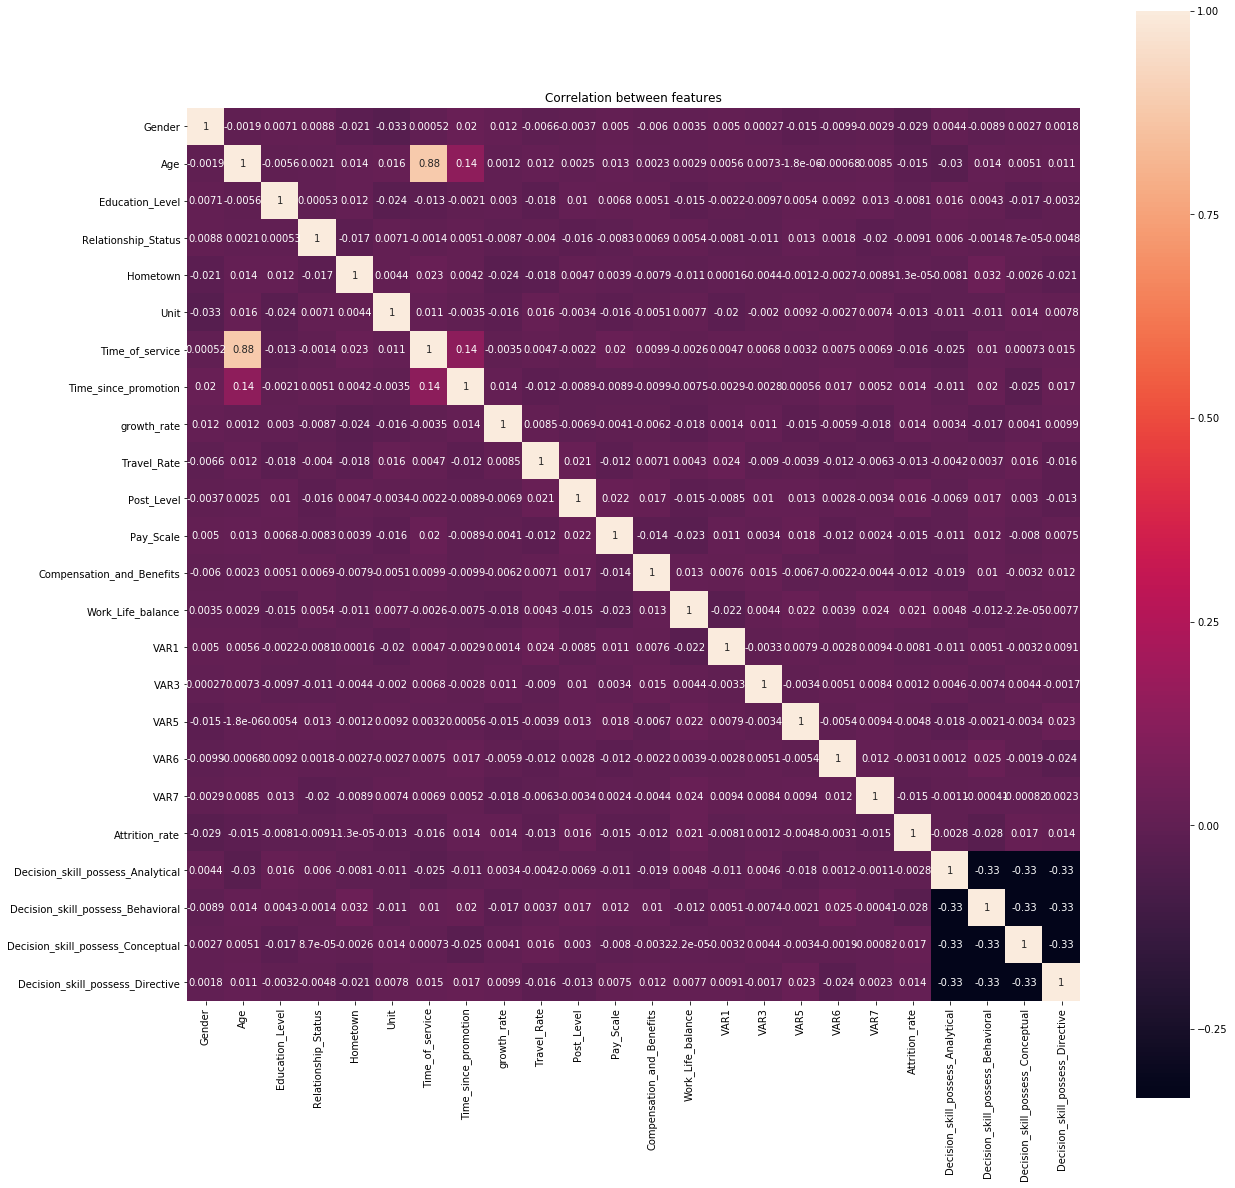

In [35]:
plt.figure(figsize=(20,20))
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, square=True,annot=True,linecolor="black") #cmap='YlGnBu',
plt.title("Correlation between features")

In [36]:
train = train.drop('Time_of_service',axis=1)
test = test.drop('Time_of_service',axis=1)

In [37]:
len(list(train.columns))

23

In [38]:
corr_target = corr['Attrition_rate']

In [39]:
corr_target
relevant_features = corr_target[corr_target>-0.05]
relevant_features

Gender                              -0.028544
Age                                 -0.015130
Education_Level                     -0.008143
Relationship_Status                 -0.009107
Hometown                            -0.000013
Unit                                -0.013088
Time_of_service                     -0.016327
Time_since_promotion                 0.013880
growth_rate                          0.014247
Travel_Rate                         -0.012608
Post_Level                           0.016402
Pay_Scale                           -0.015221
Compensation_and_Benefits           -0.012186
Work_Life_balance                    0.020809
VAR1                                -0.008073
VAR3                                 0.001245
VAR5                                -0.004770
VAR6                                -0.003130
VAR7                                -0.015299
Attrition_rate                       1.000000
Decision_skill_possess_Analytical   -0.002822
Decision_skill_possess_Behavioral 

In [40]:
train = train.drop('VAR1',axis=1)
train = train.drop('Travel_Rate',axis=1)
test = test.drop('VAR1',axis=1)
test = test.drop('Travel_Rate',axis=1)

In [41]:
len(list(train.columns))

21

#### Missing Values Hadling, Categorical data handling and and feature selection is done. 

###
### Candidates for regression models : 
* Linear Regression
* SVM regressor
* Lasso Regression
* Ridge Regression

In [42]:
from sklearn.utils import shuffle
dataset = shuffle(train)
dataset.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Time_since_promotion,growth_rate,Post_Level,Pay_Scale,...,Work_Life_balance,VAR3,VAR5,VAR6,VAR7,Attrition_rate,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
2801,-1,50.0,3,1,1,8,4,29,2,5.0,...,2.0,0.7075,2,8,3,0.8000,0,0,0,1
2628,-1,35.0,4,1,2,5,2,33,5,7.0,...,1.0,0.7075,3,7,3,0.0609,1,0,0,0
752,1,49.0,5,1,0,10,3,70,1,8.0,...,1.0,-1.6150,3,7,3,0.1121,0,0,1,0
207,1,52.0,3,1,2,5,3,69,3,2.0,...,3.0,-0.4537,5,7,3,0.1718,1,0,0,0
5903,-1,19.0,1,1,2,10,0,66,3,2.0,...,5.0,0.7075,3,8,3,0.1176,1,0,0,0


In [43]:
label = dataset['Attrition_rate']
train = dataset.drop('Attrition_rate',axis=1)

#### Split Dataset and choose between SVM regressor and linear regression

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression

In [45]:
len(train)

7000

In [46]:
train_x,validation_x,train_y,validation_y = train_test_split(train,label,test_size=0.28,random_state=0) 

In [47]:
print("length of train data : ", len(train_x))
print("length of validation data : ", len(validation_x))

length of train data :  5039
length of validation data :  1961


#### Linear Regression Baseline

In [48]:
model1 = LinearRegression()

In [49]:
train_x.isna().sum()

Gender                               0
Age                                  0
Education_Level                      0
Relationship_Status                  0
Hometown                             0
Unit                                 0
Time_since_promotion                 0
growth_rate                          0
Post_Level                           0
Pay_Scale                            0
Compensation_and_Benefits            0
Work_Life_balance                    0
VAR3                                 0
VAR5                                 0
VAR6                                 0
VAR7                                 0
Decision_skill_possess_Analytical    0
Decision_skill_possess_Behavioral    0
Decision_skill_possess_Conceptual    0
Decision_skill_possess_Directive     0
dtype: int64

In [50]:
model1.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
predict_y = model1.predict(validation_x)

In [52]:
def root_mean_squared_error(actual,predict):
    differences = [(x-y)**2 for (x,y) in zip(actual,predict)]
    return math.sqrt(sum(differences)/len(differences))

In [53]:
def performance(actual,predict):
    return 100*max(0,1-root_mean_squared_error(list(actual),predict.tolist()))
    

In [54]:
performance(validation_y,predict_y)

81.43937805662281

### SVR Baseline Model

In [55]:
model2 = svm.SVR()
model2.fit(train_x,train_y)

C:\Users\alsrivas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
predict_svr = model2.predict(validation_x)

In [57]:
performance(validation_y,predict_svr)

79.57954381458462

#### Ridge Regression Baseline: 

In [58]:
from sklearn.linear_model import Ridge

In [59]:
model3 = Ridge()

In [60]:
model3.fit(train_x,train_y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [61]:
predict_ridge = model3.predict(validation_x)
performance(validation_y,predict_ridge)

81.43942702626084

#### Lasso Model Baseline

In [62]:
from sklearn.linear_model import Lasso

In [63]:
model4 = Lasso()

In [64]:
model4.fit(train_x,train_y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
predict_lasso = model4.predict(validation_x)

In [66]:
performance(validation_y,predict_lasso)

81.54534299195362

#### We will choose Lasso Regression for parameter search

In [67]:
alpha_lasso = [0.001,0.01, 0.1, 1, 10, 100]
fit_lasso = [True, False]
selection_lasso = ['cyclic', 'random']
model_performance = []

In [68]:
best_model = None
best_performance = None
for i in alpha_lasso:
    for j in fit_lasso:
        for k in selection_lasso:
            model = Lasso(alpha=i,fit_intercept=j,selection=k)
            model.fit(train_x,train_y)
            predictY = model.predict(validation_x)
            model_per = performance(validation_y,predictY)
            model_performance.append((model_per,model))
            if best_model is None:
                best_model = model
                best_performance = model_per
            elif best_performance < model_per:
                best_performance = model_per
                best_model = model

In [69]:
best_performance

81.54534299195362

In [70]:
selected_model_lasso = sorted(model_performance, key=lambda x: x[0],reverse=True)[0]

In [71]:
selected_model_lasso

(81.54534299195362,
 Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False))

#### Parameter search for Ridge

In [72]:
alpha_ridge = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
fit_ridge = [True, False]
solver_ridge = ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']
model_performance_ridge = []

In [73]:
best_model = None
best_performance = None
for i in alpha_ridge:
    for j in fit_ridge:
        for k in solver_ridge:
            model = Ridge(alpha=i,fit_intercept=j,solver=k)
            model.fit(train_x,train_y)
            predictY = model.predict(validation_x)
            model_per = performance(validation_y,predictY)
            model_performance_ridge.append((model_per,model))
            if best_model is None:
                best_model = model
                best_performance = model_per
            elif best_performance < model_per:
                best_performance = model_per
                best_model = model

In [74]:
best_performance

81.51437892053231

In [75]:
selected_model_ridge = sorted(model_performance_ridge, key=lambda x: x[0],reverse=True)[0]

In [76]:
selected_model_ridge

(81.51437892053231,
 Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='saga', tol=0.001))

#### So, Selected model is ridge

In [77]:
print("RMSE on validation data using selected ridge model is : ", selected_model_ridge[0])

RMSE on validation data using selected ridge model is :  81.51437892053231


In [78]:
selected_model = Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='sag', tol=0.001)

In [79]:
selected_model.fit(train,label)

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='sag', tol=0.001)

In [80]:
predict_test = selected_model.predict(test).tolist()

In [81]:
type(predict_test)

list

In [82]:
print(len(test_ID), " ", len(predict_test))

3000   3000


In [83]:
import csv
with open('submission.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Employee_ID", "Attrition_rate"])
    for i in range(3000):
        writer.writerow([test_ID[i],predict_test[i]])